In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings

# Mount Google Drive
#drive.mount('/content/drive')

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/CSM_ML&DL_Project/Code/Data/densenet_test_embeddings.csv'
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()


path_to_image  \
0   train/patient47347/study3/view1_frontal.jpg   
1  train/patient37527/study12/view1_frontal.jpg   
2   train/patient41208/study9/view1_frontal.jpg   
3   train/patient39357/study1/view1_frontal.jpg   
4   train/patient31982/study4/view1_frontal.jpg   

                                    path_to_dcm   age  sex  race  \
0   train/patient47347/study3/view1_frontal.dcm  78.0    1     0   
1  train/patient37527/study12/view1_frontal.dcm  63.0    0     1   
2   train/patient41208/study9/view1_frontal.dcm  70.0    0     0   
3   train/patient39357/study1/view1_frontal.dcm  79.0    1     1   
4   train/patient31982/study4/view1_frontal.dcm  67.0    0     0   

   insurance_type  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0               1           0                           0             1   
1               2           0                           0             0   
2               1           0                           0             0   
3               1           0                           0             0   
4               0           0                           0             0   

   Lung Opacity  ...  Edema  Consolidation  Pneumonia  Atelectasis  \
0             0  ...      1              0          0            1   
1             0  ...      0              0          0            0   
2             1  ...      0              0          0            0   
3             0  ...      0              0          1            0   
4             0  ...      0              1          0            0   

   Pneumothorax  Pleural Effusion  Pleural Other  Fracture  Support Devices  \
0             0                 1              0         1                1   
1             0                 1              0         0                0   
2             0                 0              0         0                0   
3             0                 0              0         0                0   
4             0                 1              0         0                0   

                                          embeddings  
0  [0.0029132624622434378, 0.1020001769065857, 0....  
1  [0.0014348188415169716, 0.0543656125664711, 0....  
2  [0.001982336398214102, 0.040021587163209915, 0...  
3  [0.001741771469824016, 0.0560498870909214, 0.1...  
4  [9.678312198957428e-05, 0.12247737497091293, 0...  

[5 rows x 21 columns]

In [ ]:
# Define a function to safely convert 'embeddings' strings to numpy arrays
def safe_convert_embedding(embedding_str):
    if pd.isna(embedding_str):
        return np.zeros(1024, dtype=np.float32)
    try:
        # Parse the string to a list and then to a numpy array
        embedding = np.array(literal_eval(embedding_str), dtype=np.float32)

        # Ensure it's a 1D array of length 1024
        if embedding.ndim != 1 or embedding.size != 1024:
            return np.zeros(1024, dtype=np.float32)

        return embedding
    except (ValueError, SyntaxError, TypeError):
        return np.zeros(1024, dtype=np.float32)

# Apply the conversion function to the 'embeddings' column
df['embeddings_list'] = df['embeddings'].apply(safe_convert_embedding)

# Convert 'embeddings_list' to a DataFrame with each embedding dimension as a column
embeddings = pd.DataFrame(df['embeddings_list'].tolist(), columns=range(1024))

# Display the first few rows to confirm
#print(embeddings.head())


       0         1         2         3         4         5         6     \
0  0.002913  0.102000  0.163868  0.003035  0.259457  0.008299  0.073818   
1  0.001435  0.054366  0.154326  0.000073  0.181204  0.026383  0.020746   
2  0.001982  0.040022  0.094425  0.000000  0.129164  0.028082  0.043465   
3  0.001742  0.056050  0.109842  0.006427  0.098718  0.003066  0.110397   
4  0.000097  0.122477  0.306529  0.001614  0.389999  0.003756  0.010452   

       7         8         9     ...  1014      1015      1016      1017  \
0  0.017599  0.125159  0.001122  ...   0.0  0.130441  0.002577  0.058464   
1  0.000000  0.126630  0.011276  ...   0.0  0.166020  0.025159  0.045637   
2  0.010351  0.069801  0.033194  ...   0.0  0.315678  0.009477  0.286570   
3  0.015406  0.070760  0.016114  ...   0.0  0.128989  0.004958  0.100684   
4  0.003793  0.197209  0.000000  ...   0.0  0.329667  0.058173  0.250442   

       1018      1019      1020      1021      1022      1023  
0  0.001233  0.022310  0.026

## 2D & 3D PCA on Embeddings to see Gender-wise Distribution Differences

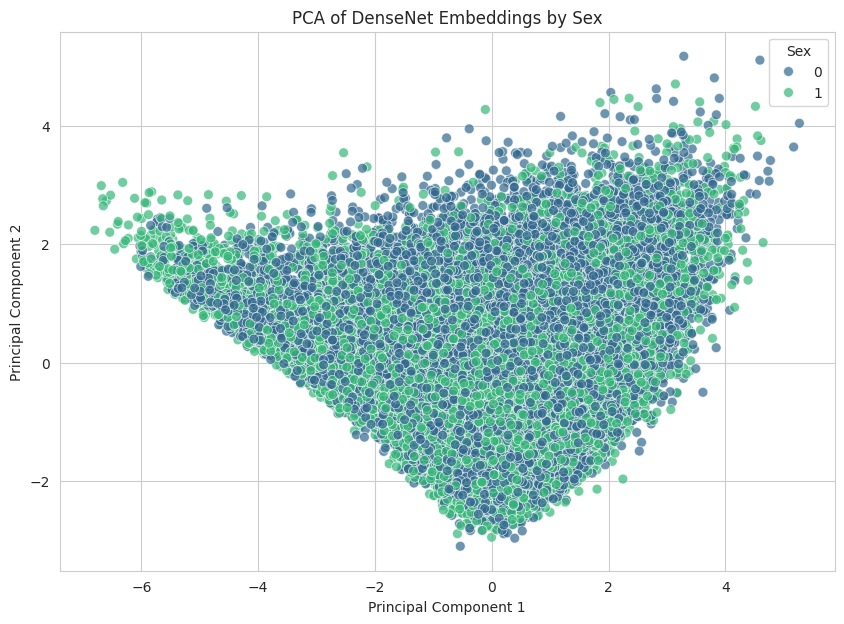

In [ ]:
# Assuming df is your DataFrame with 'embeddings_list' containing 1024-dimensional embeddings
# Convert 'embeddings_list' column into a DataFrame for PCA
embeddings = pd.DataFrame(df['embeddings_list'].tolist())

# Apply PCA to reduce embeddings to 2 dimensions
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Add the PCA results to the original DataFrame
df['PCA1'] = embeddings_pca[:, 0]
df['PCA2'] = embeddings_pca[:, 1]

# Plotting the PCA results with 'sex' as hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='sex', palette='viridis', s=50, alpha=0.7)
plt.title('PCA of DenseNet Embeddings by Sex')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sex')
plt.show()


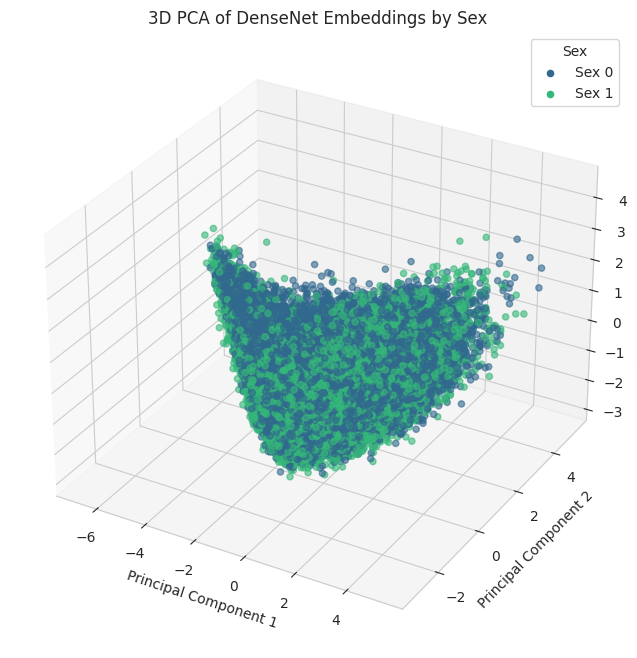

In [ ]:
# Perform PCA to reduce the embeddings to 3 dimensions
pca = PCA(n_components=3)
embeddings_pca = pca.fit_transform(df['embeddings_list'].tolist())

# Add the PCA components to the DataFrame
df['PCA1'] = embeddings_pca[:, 0]
df['PCA2'] = embeddings_pca[:, 1]
df['PCA3'] = embeddings_pca[:, 2]

# Initialize a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map sex values to colors for the plot
colors = sns.color_palette("viridis", 2)  # Using a colormap with two colors
sex_colors = df['sex'].map({0: colors[0], 1: colors[1]})

# Plot each point with its corresponding sex color
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=sex_colors, alpha=0.6, s=20)

# Set plot labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA of DenseNet Embeddings by Sex")

# Create a custom legend
legend_labels = ['Sex 0', 'Sex 1']
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], color=colors[i], label=label)
ax.legend(title="Sex")

plt.show()


## 2D & 3D PCA to see Race-wise Distribution Differences

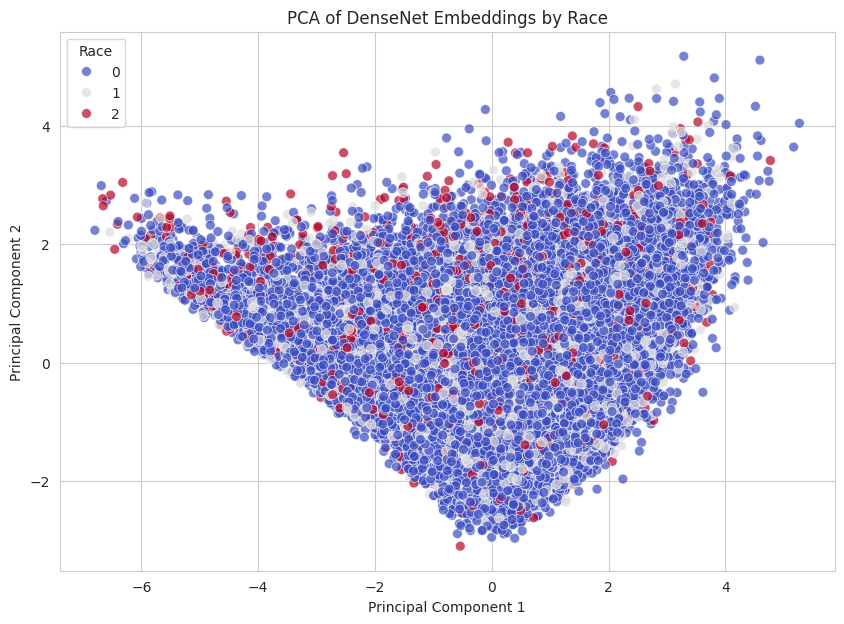

In [ ]:
# Plotting the PCA results with 'Race' as hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='race', palette='coolwarm', s=50, alpha=0.7)
plt.title('PCA of DenseNet Embeddings by Race')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Race')
plt.show()


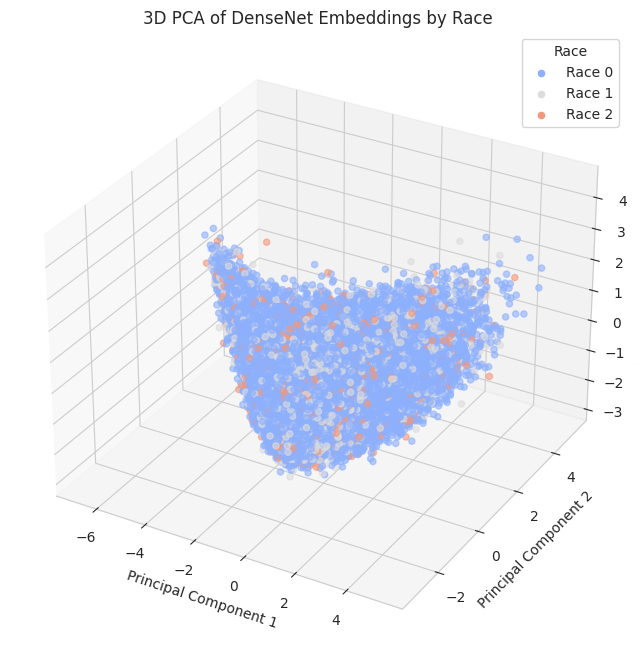

In [ ]:
# Initialize a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map sex values to colors for the plot
colors = sns.color_palette("coolwarm", 3)  # Using a colormap with two colors
race_colors = df['race'].map({0: colors[0], 1: colors[1], 2: colors[2]})

# Plot each point with its corresponding sex color
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=race_colors, alpha=0.6, s=20)

# Set plot labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA of DenseNet Embeddings by Race")

# Create a custom legend
legend_labels = ['Race 0', 'Race 1','Race 2']
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], color=colors[i], label=label)
ax.legend(title="Race")

plt.show()

## 2D & 3D PCA to see Insurance Type Distribution Differences

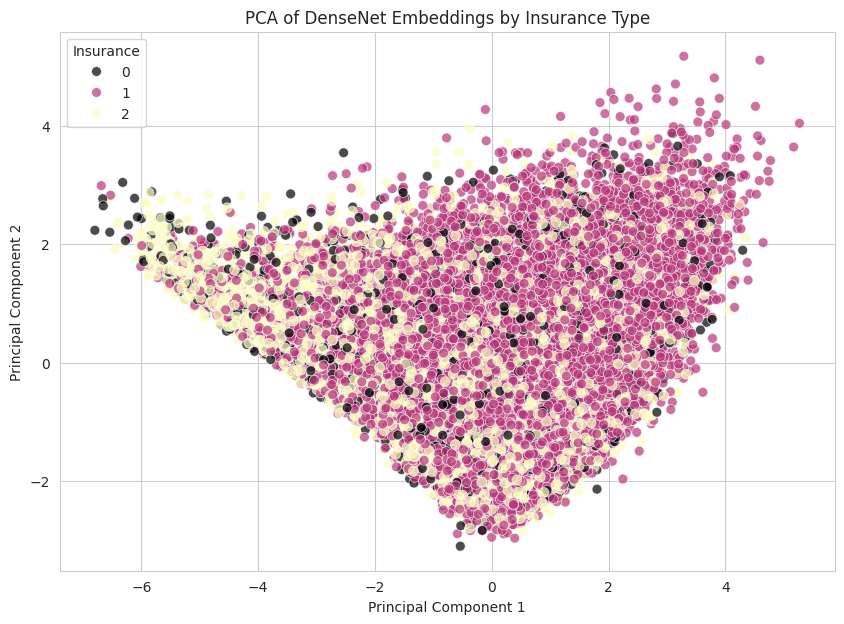

In [ ]:
# Plotting the PCA results with 'Race' as hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='insurance_type', palette='magma', s=50, alpha=0.7)
plt.title('PCA of DenseNet Embeddings by Insurance Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Insurance')
plt.show()


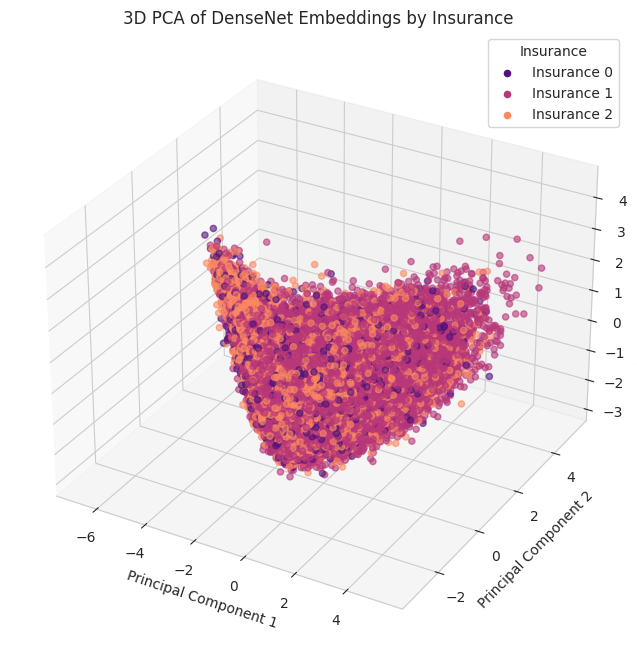

In [ ]:
# Initialize a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map sex values to colors for the plot
colors = sns.color_palette("magma", 3)  # Using a colormap with two colors
ins_colors = df['insurance_type'].map({0: colors[0], 1: colors[1], 2: colors[2]})

# Plot each point with its corresponding sex color
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=ins_colors, alpha=0.6, s=20)

# Set plot labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA of DenseNet Embeddings by Insurance")

# Create a custom legend
legend_labels = ['Insurance 0', 'Insurance 1','Insurance 2']
for i, label in enumerate(legend_labels):
    ax.scatter([], [], [], color=colors[i], label=label)
ax.legend(title="Insurance")

plt.show()

## 4 Component PCA

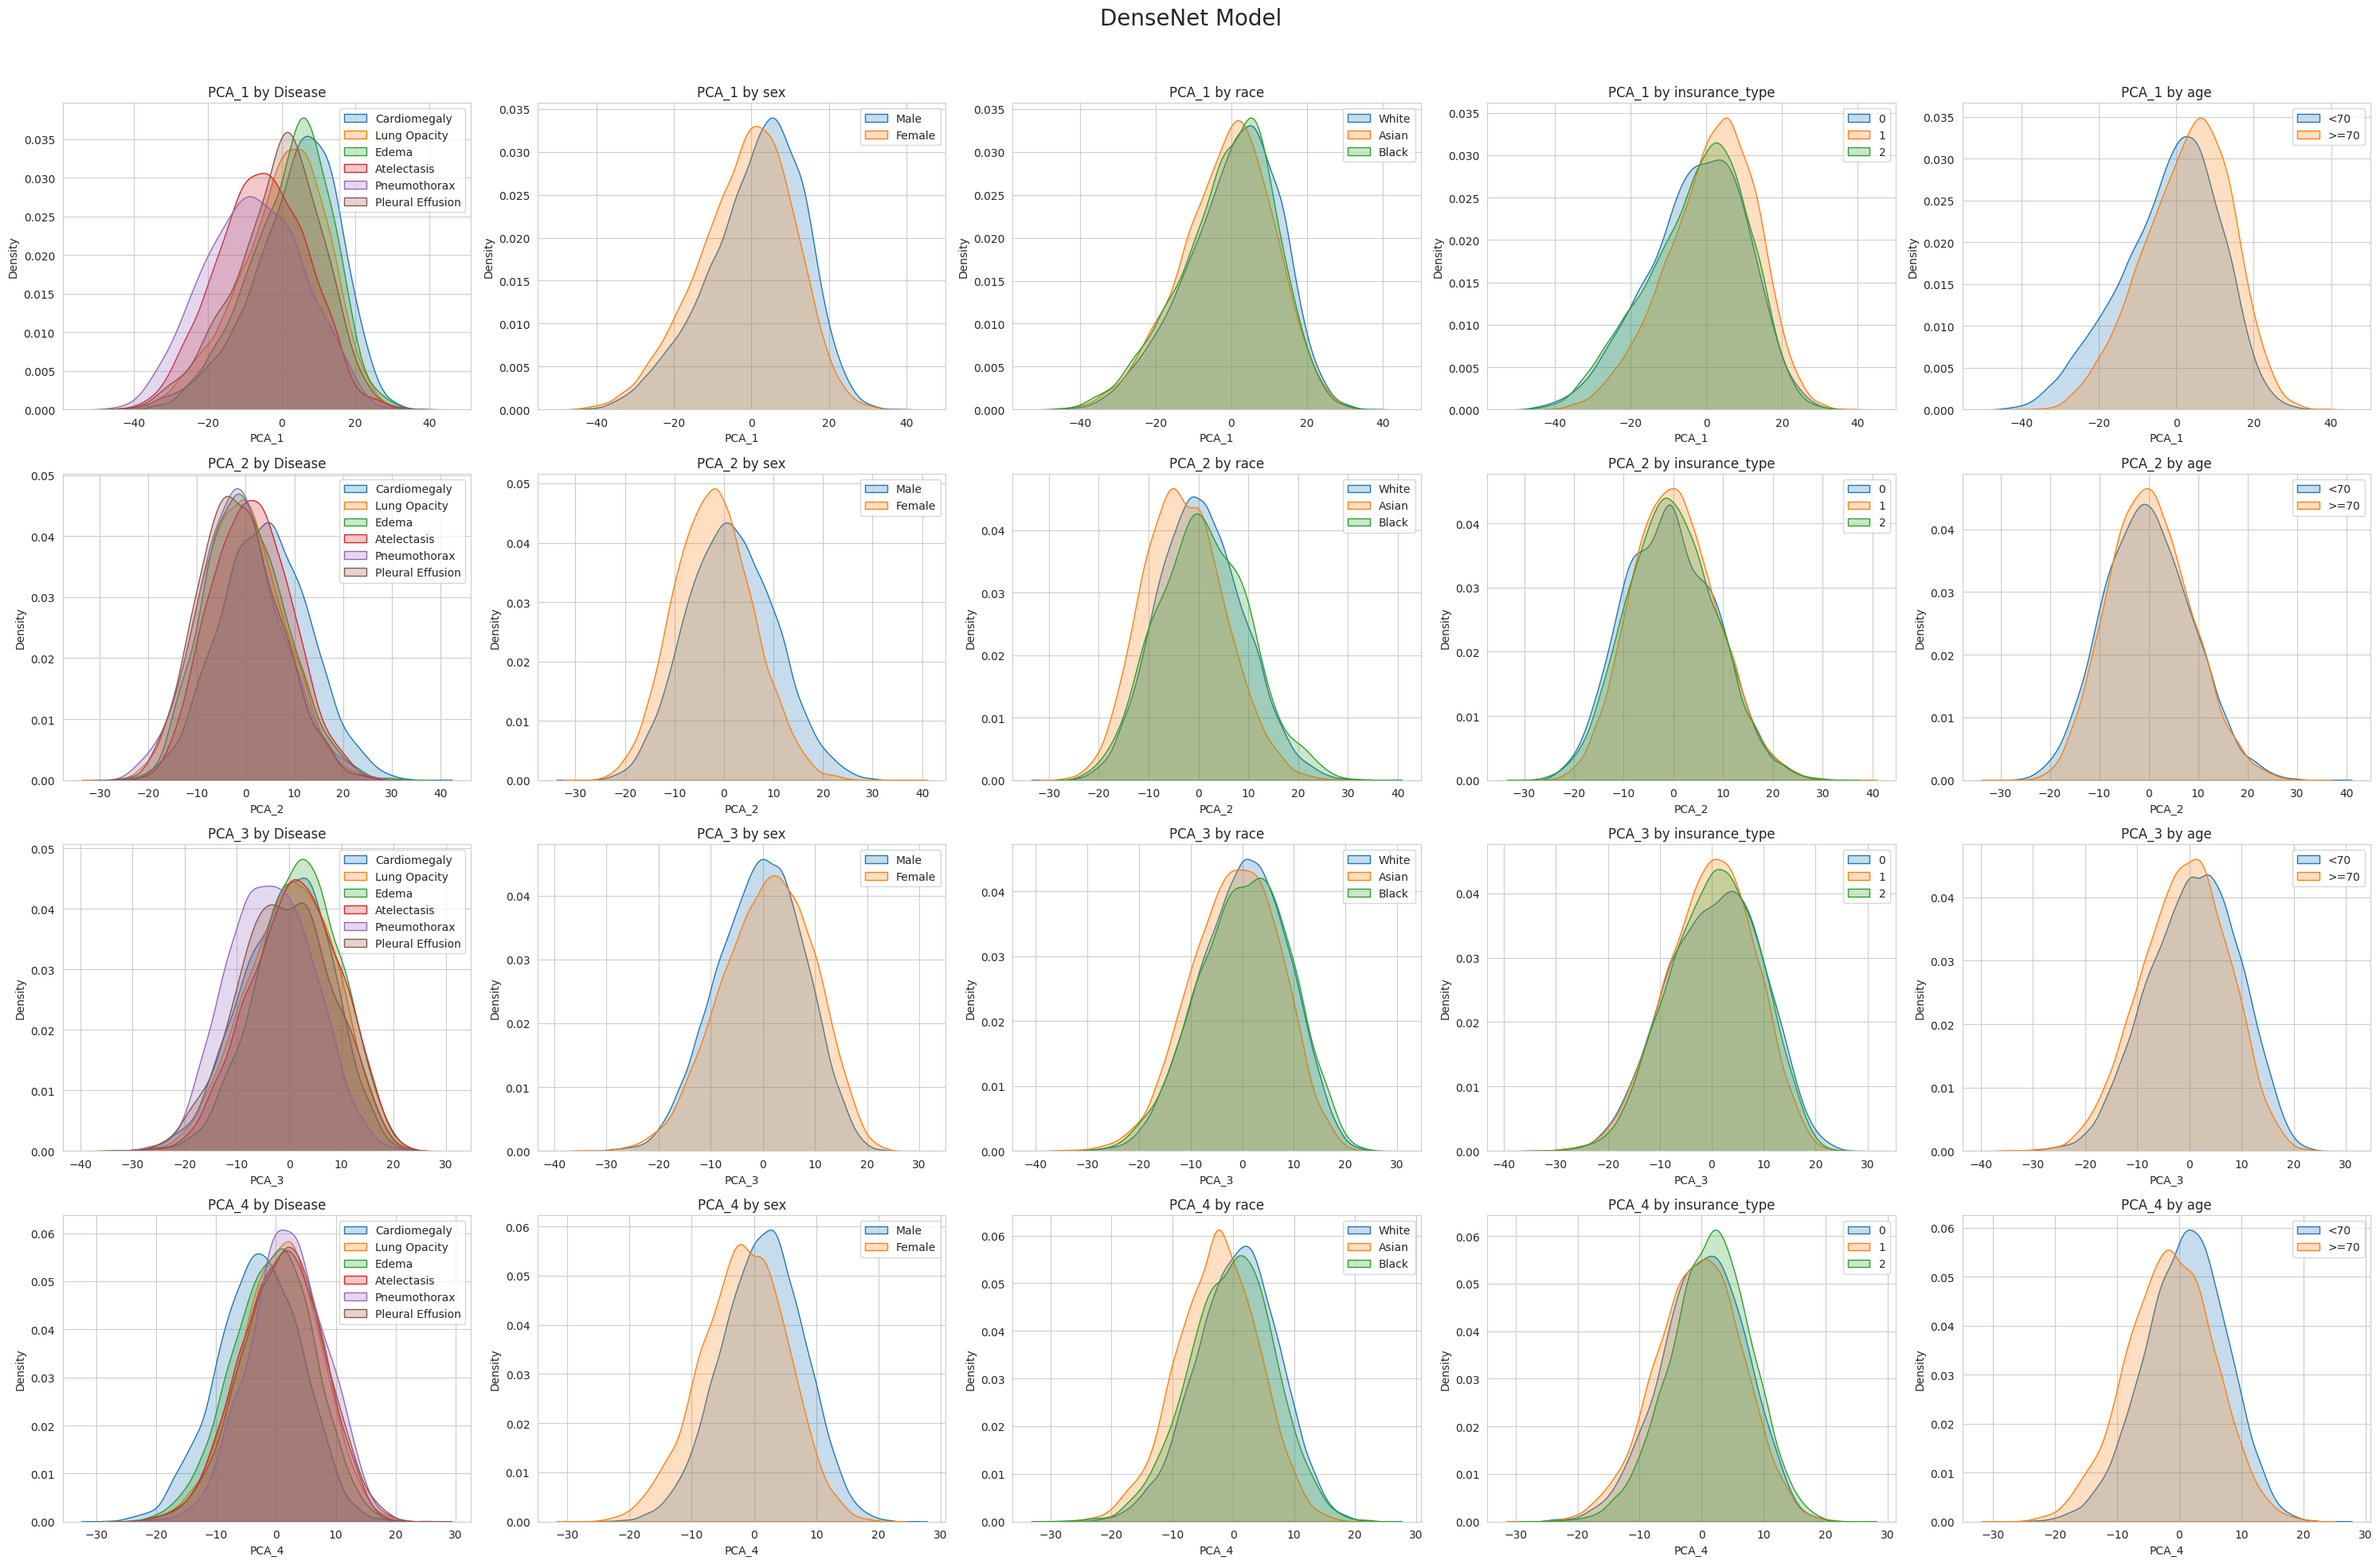

In [ ]:
# Step 1: Create a subset of the dataframe with specific diseases
diseases_of_interest = ['Cardiomegaly', 'Lung Opacity', 'Edema', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion']
new_df = df[df[diseases_of_interest].any(axis=1)].copy()

# Step 2: Extract embeddings and normalize the data
embeddings = np.array(new_df['embeddings_list'].tolist())
scaler = StandardScaler()
embeddings_normalized = scaler.fit_transform(embeddings)

# Step 3: Apply PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(embeddings_normalized)

# Add PCA results to the dataframe
for i in range(4):
    new_df[f'PCA_{i+1}'] = pca_result[:, i]

# Step 4: Plotting density plots for PCA modes by different groups
pca_modes = [f'PCA_{i+1}' for i in range(4)]
categories = {
    'Disease': diseases_of_interest,
    'sex': ['Male', 'Female'],
    'race': ['White', 'Asian', 'Black'],
    'insurance_type': [0, 1, 2],
    'age': ['<70', '>=70']
}

# Creating a 'Disease_Label' column to combine disease data
new_df['Disease_Label'] = new_df[diseases_of_interest].idxmax(axis=1)

# Creating an 'Age_Category' column based on age
new_df['Age_Category'] = np.where(new_df['age'] < 70, '<70', '>=70')

# Plot density plots
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
fig.suptitle('DenseNet Model', fontsize=20)

for idx, (category, values) in enumerate(categories.items()):
    for i, pca_mode in enumerate(pca_modes):
        ax = axes[i, idx]
        if category == 'Disease':
            for value in values:
                subset = new_df[new_df['Disease_Label'] == value]
                sns.kdeplot(subset[pca_mode], ax=ax, label=value, fill=True)
        else:
            for value in values:
                if category == 'age':
                    subset = new_df[new_df['Age_Category'] == value]
                else:
                    subset = new_df[new_df[category] == value]
                if not subset.empty:  # Check if subset is not empty before plotting
                    sns.kdeplot(subset[pca_mode], ax=ax, label=value, fill=True)

        ax.set_title(f'{pca_mode} by {category}')
        ax.set_xlabel(pca_mode)
        ax.set_ylabel('Density')
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 2 Component T-SNE

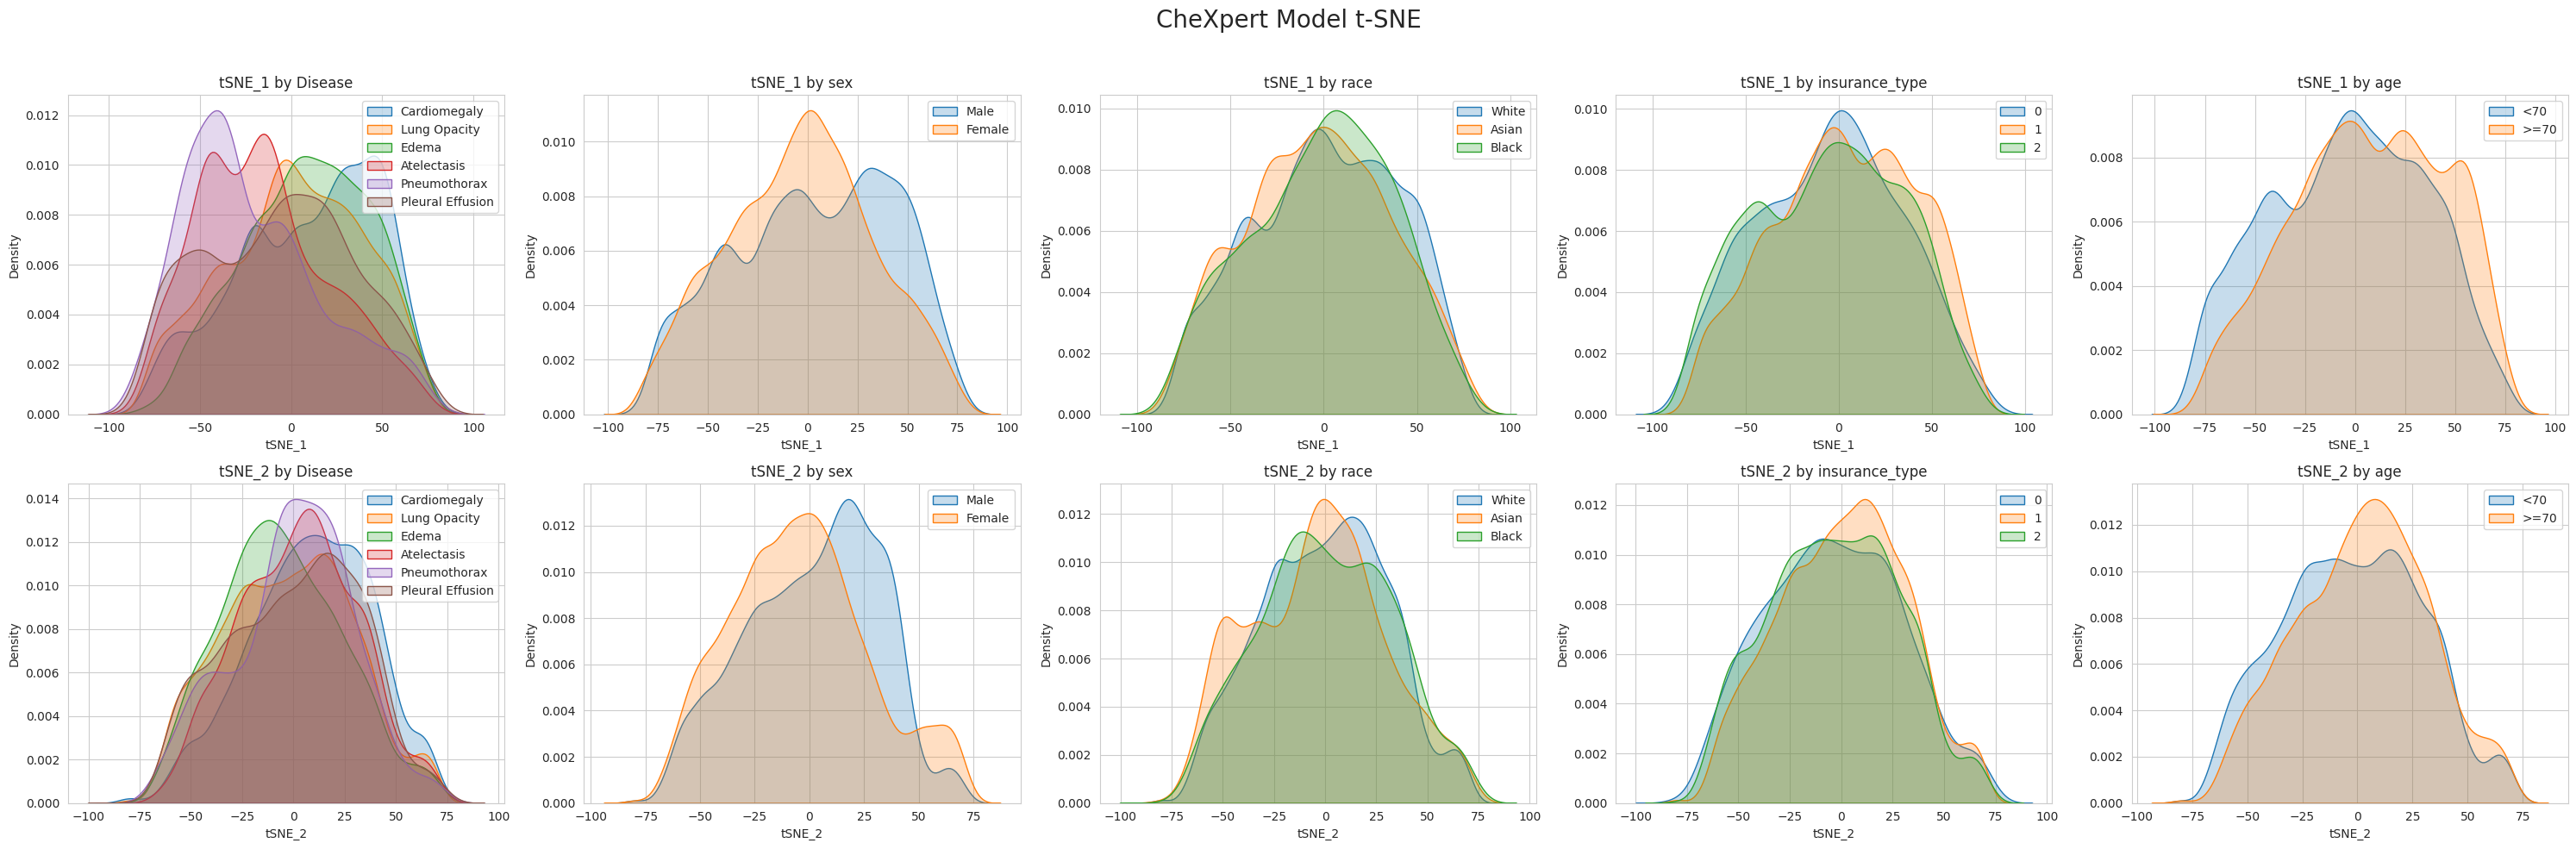

In [ ]:
# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, n_jobs = -1)
tsne_result = tsne.fit_transform(embeddings_normalized)

# Add t-SNE results to the dataframe
new_df['tSNE_1'] = tsne_result[:, 0]
new_df['tSNE_2'] = tsne_result[:, 1]

# Step 4: Plotting density plots for t-SNE modes by different groups
tsne_modes = ['tSNE_1', 'tSNE_2']
categories = {
    'Disease': diseases_of_interest,
    'sex': ['Male', 'Female'],
    'race': ['White', 'Asian', 'Black'],
    'insurance_type': [0, 1, 2],
    'age': ['<70', '>=70']
}

# Creating a 'Disease_Label' column to combine disease data
new_df['Disease_Label'] = new_df[diseases_of_interest].idxmax(axis=1)

# Creating an 'Age_Category' column based on age
new_df['Age_Category'] = np.where(new_df['age'] < 70, '<70', '>=70')

# Plot density plots
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
fig.suptitle('CheXpert Model t-SNE', fontsize=20)

for idx, (category, values) in enumerate(categories.items()):
    for i, tsne_mode in enumerate(tsne_modes):
        ax = axes[i, idx]
        if category == 'Disease':
            for value in values:
                subset = new_df[new_df['Disease_Label'] == value]
                sns.kdeplot(subset[tsne_mode], ax=ax, label=value, fill=True)
        else:
            for value in values:
                if category == 'age':
                    subset = new_df[new_df['Age_Category'] == value]
                else:
                    subset = new_df[new_df[category] == value]
                if not subset.empty:  # Check if subset is not empty before plotting
                    sns.kdeplot(subset[tsne_mode], ax=ax, label=value, fill=True)

        ax.set_title(f'{tsne_mode} by {category}')
        ax.set_xlabel(tsne_mode)
        ax.set_ylabel('Density')
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
